# Naïve Bayes Classifier 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import random


# code and accuracy methods from https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#14.-Check-accuracy-score-

In [2]:
# Load density data

MMS2_n = pd.read_csv('MMS2_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])


# load temperature data
MMS2_Tperp = pd.read_csv('MMS2_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS2_Tpara = pd.read_csv('MMS2_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])


MMS2_n

,times,n,date
0,1.592421e+09,0.384797,2020-06-17 19:17:13.094996992
1,1.592421e+09,0.390098,2020-06-17 19:17:13.244997120
2,1.592421e+09,0.400450,2020-06-17 19:17:13.394996992
3,1.592421e+09,0.377668,2020-06-17 19:17:13.544997120
4,1.592421e+09,0.395304,2020-06-17 19:17:13.694996992
...,...,...,...
134580,1.592452e+09,13.960220,2020-06-18 03:41:32.274036992
134581,1.592452e+09,13.939400,2020-06-18 03:41:32.424037120
134582,1.592452e+09,14.419994,2020-06-18 03:41:32.574036992
134583,1.592452e+09,14.073477,2020-06-18 03:41:32.724037120


## Data Processing

In [3]:
# Magnteosphere time periods were identified by eye. 
# Find matching indices to classify density data set into being either 1 magnetosphere, or 0 not magnetosphere


# Identified magnetosphere time periods





NB_st_time = '2020-06-17/20:30:00'

NB_end_time = '2020-06-17/23:00:53'

NB_st_idx = MMS2_n.date.searchsorted(NB_st_time)
NB_end_idx = MMS2_n.date.searchsorted(NB_end_time)

# def MSP_classification(density_arr, )








print(NB_st_idx)

print(NB_end_idx)





645
60995


### We will have 60,350 data points that are classified as either 1 (yes we're in Magnetosphere) or 0 (no we are not in the Magnetosphere)

In [4]:



# create an array the length of the classified data, fill with 0's
MSP = np.zeros(len(MMS2_n.date))






Magnetosphere_st_stop_times = ['2020-06-17/20:30:00','2020-06-17/21:16:31',
'2020-06-17/21:32:41','2020-06-17/21:35:30',
'2020-06-17/21:38:54','2020-06-17/21:41:40', 
'2020-06-17/21:49:00','2020-06-17/21:53:39',
'2020-06-17/21:56:49','2020-06-17/22:00:36',
'2020-06-17/22:04:52','2020-06-17/22:10:44',
'2020-06-17/22:13:28', '2020-06-17/22:16:47',
'2020-06-17/22:20:06','2020-06-17/22:23:55',
'2020-06-17/22:27:45','2020-06-17/22:30:56',
'2020-06-17/22:34:34','2020-06-17/22:37:37',
'2020-06-17/22:39:17','2020-06-17/22:43:45',
'2020-06-17/22:46:41','2020-06-17/22:49:33',
'2020-06-17/22:55:59','2020-06-17/23:00:53']


# too lazy to reformat the original list, so specify that start times are every other 
# element starting at 0th index, end times are every other index starting at 1st index

st_times = Magnetosphere_st_stop_times[::2]
end_times = Magnetosphere_st_stop_times[1::2]

for t in range(len(st_times)):
    st_idx_1 = MMS2_n.date.searchsorted(st_times[t])
    print('start index:',st_idx_1)
    end_idx_1 = MMS2_n.date.searchsorted(end_times[t])
    print('end index:',end_idx_1)
    MSP[st_idx_1:end_idx_1] = 1
    print('\n')
    

    

# save to a .csv so I can visually inspect the result
#pd.DataFrame(MSP).to_csv('MSP_classifier.csv', index=False) 


start index: 645
end index: 19251


start index: 25718
end index: 26844


start index: 28204
end index: 29311


start index: 32244
end index: 34104


start index: 35371
end index: 36884


start index: 38591
end index: 40938


start index: 42031
end index: 43358


start index: 44683
end index: 46210


start index: 47743
end index: 49016


start index: 50470
end index: 51690


start index: 52356
end index: 54143


start index: 55316
end index: 56463


start index: 59035
end index: 60995




In [5]:
# Check to make sure there are 0's and 1's where you want them
print(MSP[26843:28205])

[1. 0. 0. ... 0. 0. 1.]


In [6]:
#NB_n_DF = MMS2_n.iloc[NB_st_idx:NB_end_idx]


n = np.array(MMS2_n.n[NB_st_idx:NB_end_idx])


print(n)

# NB_n_DF['MSP_classifier'] = MSP[NB_st_idx:NB_end_idx]

NB_DF = pd.DataFrame(data = {"times": MMS2_n.times[NB_st_idx:NB_end_idx],
                             "n": MMS2_n.n[NB_st_idx:NB_end_idx],
                             "Tpara": MMS2_Tpara.Tpara[NB_st_idx:NB_end_idx],
                            "Tperp": MMS2_Tperp.Tperp[NB_st_idx:NB_end_idx],
                            "MSP":MSP[NB_st_idx:NB_end_idx]})


NB_DF


[0.989079  0.9637257 0.9444995 ... 1.0501395 1.0778915 1.1071372]


,times,n,Tpara,Tperp,MSP
645,1.592426e+09,0.989079,525.85547,499.37415,1.0
646,1.592426e+09,0.963726,504.76862,515.45215,1.0
647,1.592426e+09,0.944500,487.18292,479.80856,1.0
648,1.592426e+09,0.953222,581.82440,515.65250,1.0
649,1.592426e+09,0.978770,516.98810,498.97446,1.0
...,...,...,...,...,...
60990,1.592435e+09,1.109043,396.39496,422.18692,1.0
60991,1.592435e+09,1.100456,392.12500,423.97350,1.0
60992,1.592435e+09,1.050140,374.55520,437.87630,1.0
60993,1.592435e+09,1.077892,323.79974,385.11502,1.0


In [7]:
X = NB_DF.drop(['MSP'], axis=1)

y = NB_DF['MSP']

## Split Data

In [8]:
# split X and y into training and testing sets




from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [9]:
X_train.shape, X_test.shape

((42245, 4), (18105, 4))

## Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler


# have to use MinMax because I was getting errors for having negative numbers
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Create new data frames from the scaled data
X_train = pd.DataFrame(X_train, columns = ['times','n','Tpara','Tperp'])

X_test = pd.DataFrame(X_test, columns = ['times','n','Tpara','Tperp'])

# make sure it looks right
X_train.head()

,times,n,Tpara,Tperp
0,0.605478,0.494654,0.036465,0.026406
1,0.824769,0.069131,0.362029,0.501811
2,0.315382,0.229736,0.100572,0.155099
3,0.242639,0.020280,0.804370,0.829552
4,0.611858,0.630036,0.043078,0.016433


 ### Train the model

In [11]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import MultinomialNB


# instantiate the model
mnb = MultinomialNB()


# fit the model
mnb.fit(X_train, y_train)

MultinomialNB()

### Predict data

In [21]:
y_pred = mnb.predict(X_test)


18105


/Users/christylentz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [ ]:
y_pred

### Check Accuracy

In [13]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7276


### Compare Train-set and test-set accuracy

In [14]:
y_pred_train = mnb.predict(X_train)

y_pred_train

array([0., 1., 1., ..., 1., 1., 1.])

In [15]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.7238


### Check for over or under fitting

In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(mnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(mnb.score(X_test, y_test)))

Training set score: 0.7238
Test set score: 0.7276


# Check Null Accuracy

In [18]:
# check class distribution in test set

# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

y_test.value_counts()

MSP
1.0    11077
0.0     7028
Name: count, dtype: int64

In [19]:
# calculate null accuracy by dividing by the # of occurences of the most frequent class (11077)
null_accuracy = (11077/(11077+7028))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6118


In [ ]:

# NB model is doing pretty well if null accuracy score is 61% and ours is 72%

### Confusion Matrix

In [25]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 2097  4931]
 [    0 11077]]

True Positives(TP) =  2097

True Negatives(TN) =  11077

False Positives(FP) =  4931

False Negatives(FN) =  0


<Axes: >

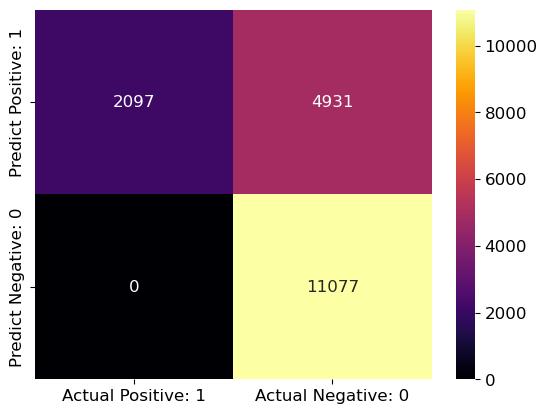

In [47]:
import seaborn as sns # for statistical data visualization

cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive: 1', 'Actual Negative: 0'], 
                                 index=['Predict Positive: 1', 'Predict Negative: 0'])

sns.heatmap(cm_matrix, annot = True, fmt='d', cmap='inferno')

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.30      0.46      7028
         1.0       0.69      1.00      0.82     11077

    accuracy                           0.73     18105
   macro avg       0.85      0.65      0.64     18105
weighted avg       0.81      0.73      0.68     18105



In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [30]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7276


In [31]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2724


In [32]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.2984


In [33]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [34]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


True Positive Rate : 1.0000


In [35]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3080


In [36]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6920


In [38]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = mnb.predict_proba(X_test)[0:10]

y_pred_prob


/Users/christylentz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


array([[0.45157802, 0.54842198],
       [0.46911613, 0.53088387],
       [0.36872761, 0.63127239],
       [0.63341008, 0.36658992],
       [0.35241607, 0.64758393],
       [0.51867677, 0.48132323],
       [0.30031388, 0.69968612],
       [0.40817896, 0.59182104],
       [0.29976955, 0.70023045],
       [0.38517583, 0.61482417]])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.30      0.46      7028
         1.0       0.69      1.00      0.82     11077

    accuracy                           0.73     18105
   macro avg       0.85      0.65      0.64     18105
weighted avg       0.81      0.73      0.68     18105



In [41]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Not MSP', 'MSP'])

y_pred_prob_df

,Not MSP,MSP
0,0.451578,0.548422
1,0.469116,0.530884
2,0.368728,0.631272
3,0.633410,0.366590
4,0.352416,0.647584
5,0.518677,0.481323
6,0.300314,0.699686
7,0.408179,0.591821
8,0.299770,0.700230
9,0.385176,0.614824


In [43]:
# print the first 10 predicted probabilities for class 1 - Probability of MSP

mnb.predict_proba(X_test)[0:10, 1]
# store the predicted probabilities for class 1 - Probability of being in MSP

y_pred1 = mnb.predict_proba(X_test)[:, 1]

/Users/christylentz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/christylentz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


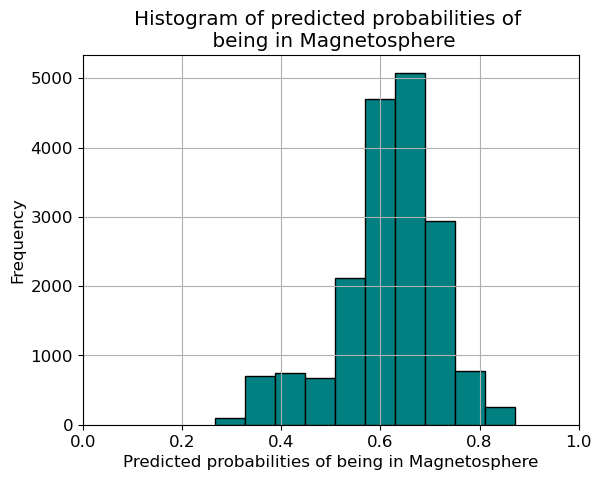

In [45]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10, color = "teal", ec="k")


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of \n being in Magnetosphere')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of being in Magnetosphere')
plt.ylabel('Frequency')
plt.grid('on')
